### This notebook presenting work with SEG-Y headers and a simple example of relative seismic inversion.

By/ Alaa Hassan

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import segyio
import pylops
import re
from segysak.segy import segy_header_scan
from IPython.display import display


#### Scanning the headers


In [2]:
scan = segy_header_scan('..\path\..Data.sgy')
scan

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
FieldRecord,9,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
TraceNumber,13,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
EnergySourcePoint,17,1000.0,1002.128,0.929774,1001.0,1001.00,1002.0,1003.00,1004.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [3]:
with pd.option_context("display.max_rows", 89):
    display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
FieldRecord,9,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
TraceNumber,13,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
EnergySourcePoint,17,1000.0,1002.128,0.929774,1001.0,1001.00,1002.0,1003.00,1004.0
CDP,21,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
CDP_TRACE,25,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
TraceIdentificationCode,29,1000.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0
NSummedTraces,31,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
NStackedTraces,33,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [4]:
scan[scan["std"] > 0]


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
TraceNumber,13,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
EnergySourcePoint,17,1000.0,1002.128,0.929774,1001.0,1001.00,1002.0,1003.00,1004.0
CDP,21,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
CDP_TRACE,25,1000.0,148.564,92.434962,1.0,63.00,146.0,229.00,312.0
SourceX,73,1000.0,2615644.242,1304.391988,2613548.0,2614439.50,2615605.0,2616780.00,2617962.0
SourceY,77,1000.0,6215423.281,470.953432,6214568.0,6215013.50,6215434.0,6215853.25,6216220.0
GroupX,81,1000.0,2615644.242,1304.391988,2613548.0,2614439.50,2615605.0,2616780.00,2617962.0
GroupY,85,1000.0,6215423.281,470.953432,6214568.0,6215013.50,6215434.0,6215853.25,6216220.0


In [5]:
# Functions allow for the parsing of both text and traces headers into a dict and a pandas dataframe respectively.
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def parse_text_header(segyfile):
    '''
    Format segy text header into a readable, clean dict
    '''
    raw_header = segyio.tools.wrap(segyfile.text[0])
    # Cut on C*int pattern
    cut_header = re.split(r'C ', raw_header)[1::]
    # Remove end of line return
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    # Format in dict
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header

In [6]:
filename = '..\path\..Data.sgy'
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
    text_headers = parse_text_header(f)
    trace_headers = parse_trace_headers(f, n_traces)
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 46176, N Samples: 2001, Sample rate: 2.0ms'

In [7]:
bin_headers

{JobID: 9999, LineNumber: 148, ReelNumber: 1, Traces: 312, AuxTraces: 312, Interval: 2000, IntervalOriginal: 2000, Samples: 2001, SamplesOriginal: 2001, Format: 1, EnsembleFold: 1, SortingCode: 0, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 0, SEGYRevisionMinor: 0, TraceFlag: 0, ExtendedHeaders: 0}

In [8]:
trace_headers.columns  

Index(['TRACE_SEQUENCE_LINE', 'TRACE_SEQUENCE_FILE', 'FieldRecord',
       'TraceNumber', 'EnergySourcePoint', 'CDP', 'CDP_TRACE',
       'TraceIdentificationCode', 'NSummedTraces', 'NStackedTraces', 'DataUse',
       'offset', 'ReceiverGroupElevation', 'SourceSurfaceElevation',
       'SourceDepth', 'ReceiverDatumElevation', 'SourceDatumElevation',
       'SourceWaterDepth', 'GroupWaterDepth', 'ElevationScalar',
       'SourceGroupScalar', 'SourceX', 'SourceY', 'GroupX', 'GroupY',
       'CoordinateUnits', 'WeatheringVelocity', 'SubWeatheringVelocity',
       'SourceUpholeTime', 'GroupUpholeTime', 'SourceStaticCorrection',
       'GroupStaticCorrection', 'TotalStaticApplied', 'LagTimeA', 'LagTimeB',
       'DelayRecordingTime', 'MuteTimeStart', 'MuteTimeEND',
       'TRACE_SAMPLE_COUNT', 'TRACE_SAMPLE_INTERVAL', 'GainType',
       'InstrumentGainConstant', 'InstrumentInitialGain', 'Correlated',
       'SweepFrequencyStart', 'SweepFrequencyEnd', 'SweepLength', 'SweepType',
       'Swee

In [9]:
text_headers

{'C01': '1 CLIENT                        COMPANY                       CREW NO ',
 'C02': '2 LINE 3D-WAIPUKU AREA                        MAP ID ',
 'C03': '3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER ',
 'C04': '4 SHOTPOINT:    5       LONG       SHOTPOINT FOR 2D AND 3D SURVEY DATA ',
 'C05': '5 LINE NUMBER:  17       LONG       LINE RECORD ',
 'C06': '6 TRACE NUMBER: 25       LONG       TRACE RECORD(CDP Number) ',
 'C07': '7 SHOTPOINT:   21       LONG       SHOTPOINT FOR ARBITRARY LINE ',
 'C08': '8 CDP_X:        73       LONG       CDPBIN NUMBER ',
 'C09': '9 CDP_Y:        77       LONG       CDPBIN NUMBER C10 NSAMPLE:      115 UNSIGNED SHORT  NUMBER OF SAMPLES C11 SRATE:        117 UNSIGNED SHORT  SAMPLE RATE C12 C13 C14 C15 C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29 C30 C31 C32 C33 C34 C35 C36 C37 C38 C39 C40 END EBCD'}

In [10]:
trace_headers.head()

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1,0,1,1001,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,2,1001,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,3,1001,3,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,4,1001,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,5,0,5,1001,5,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Plotting

In [11]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 16331; the max amplitude is 141386'

Text(0.5, 1.0, 'Data.sgy')

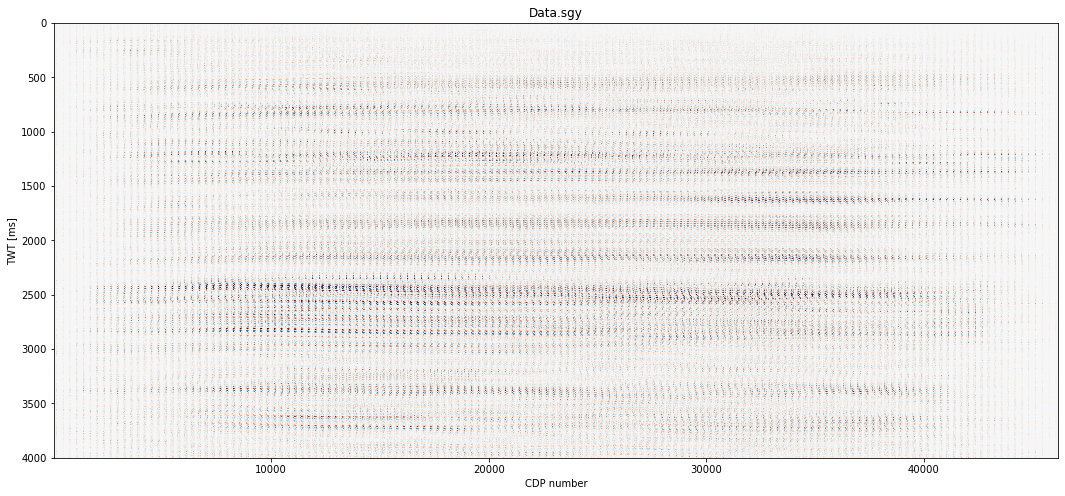

In [12]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, twt[-1], twt[0]]  # define extent
ax.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT [ms]')
ax.set_title(f'Data.sgy')

### Seismic inversion of data


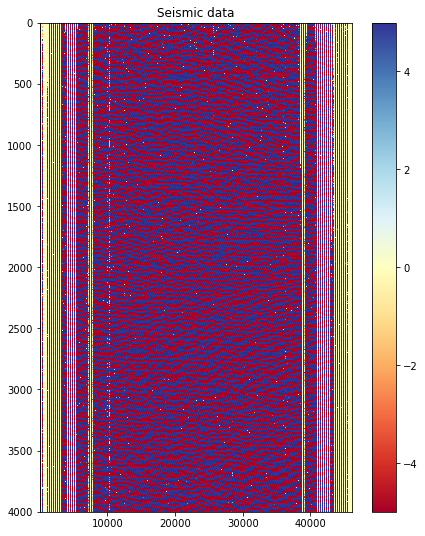

In [13]:
# read seismic data and display
segyfile = '..\path\..Data.sgy'

f = segyio.open(segyfile, iline=segyio.tracefield.TraceField.SourceEnergyDirectionExponent, 
                xline=segyio.tracefield.TraceField.CDP)

il, xl, t = f.ilines, f.xlines, f.samples
dt = t[1] - t[0]

d = segyio.cube(f)
nil, nxl, nt = d.shape

plt.figure(figsize=(7, 9))
plt.imshow(d[nil//2].T, cmap='RdYlBu', vmin=-5, vmax=5,
           extent=(xl[0], xl[-1], t[-1], t[0]))
plt.title('Seismic data')
plt.colorbar()
plt.axis('tight');

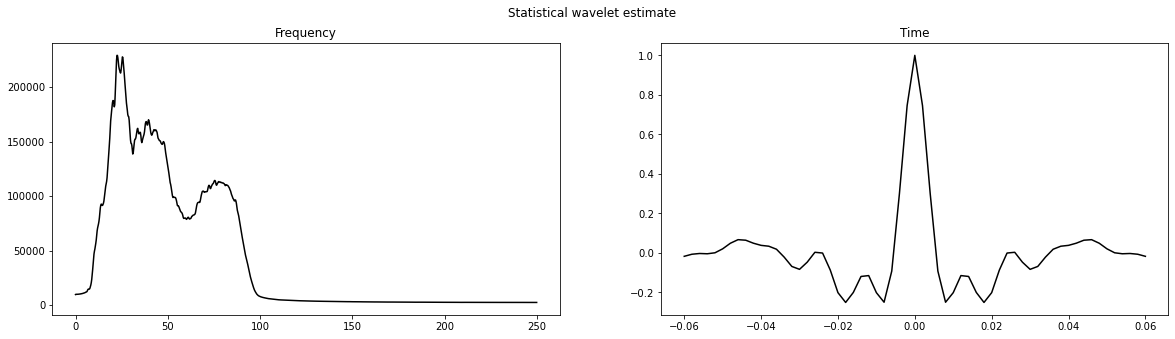

In [14]:
# Get a quick estimate of the wavelet 
nt_wav = 31 # lenght of wavelet in samples
nfft = 2**11 # lenght of fft

# time axis for wavelet
t_wav = np.arange(nt_wav) * (dt/1000) 
t_wav = np.concatenate((np.flipud(-t_wav[1:]), t_wav), axis=0)

# estimate wavelet spectrum
wav_est_fft = np.mean(np.abs(np.fft.fft(d[..., :500], nfft, axis=-1)), axis=(0, 1))
fwest = np.fft.fftfreq(nfft, d=dt/1000)

# create wavelet in time
wav_est = np.real(np.fft.ifft(wav_est_fft)[:nt_wav])
wav_est = np.concatenate((np.flipud(wav_est[1:]), wav_est), axis=0)
wav_est = wav_est / wav_est.max()
wcenter = np.argmax(np.abs(wav_est))

# display wavelet
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Statistical wavelet estimate')
axs[0].plot(fwest[:nfft//2], wav_est_fft[:nfft//2], 'k')
axs[0].set_title('Frequency')
axs[1].plot(t_wav, wav_est, 'k')
axs[1].set_title('Time');

In [15]:
# swap time axis to first dimension
d_small = d[..., :500]
d_small = np.swapaxes(d_small, -1, 0)

m_relative, r_relative = \
    pylops.avo.poststack.PoststackInversion(d_small, wav_est, m0=np.zeros_like(d_small), explicit=True, epsI=1e-4,
                                            simultaneous=False)
m_relative_reg, r_relative_reg = \
    pylops.avo.poststack.PoststackInversion(d_small, wav_est, m0=m_relative, epsI=1e-4, epsR=1e0, 
                                            **dict(iter_lim=10, show=2))
# swap time axis back to last dimension
d_small = np.swapaxes(d_small, 0, -1)
m_relative = np.swapaxes(m_relative, 0, -1)
m_relative_reg = np.swapaxes(m_relative_reg, 0, -1)
r_relative = np.swapaxes(r_relative, 0, -1)
r_relative_reg = np.swapaxes(r_relative_reg, 0, -1)

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 46176000 rows and 23088000 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =       10
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   3.085e+07  3.085e+07    1.0e+00  1.1e-07
     1  0.00000e+00   1.315e+07  1.315e+07    4.3e-01  5.2e-01   3.7e+00  1.0e+00
     2  0.00000e+00   9.752e+06  9.752e+06    3.2e-01  3.1e-01   4.8e+00  2.1e+00
     3  0.00000e+00   8.334e+06  8.334e+06    2.7e-01  2.1e-01   5.8e+00  3.5e+00
     4  0.00000e+00   7.517e+06  7.517e+06    2.4e-01  1.4e-01   6.7e+00  5.1e+00
     5  0.00000e+00   7.010e+06  7.010e+06    2.3e-01  1.0e-01   7.4e+00  6.9e+00
     6  0.00000e+00   6.702e+06  6.702e+06    2.2e-01  7.9e-02   8.1e+00  8.8e+00
     7  0.00000e+00   6.495e+06  6.495e+06    2.1e-01  6.0e-02   8.7e+00  1.1e+01
     8  0.00000e+00   6.34

Compare the results

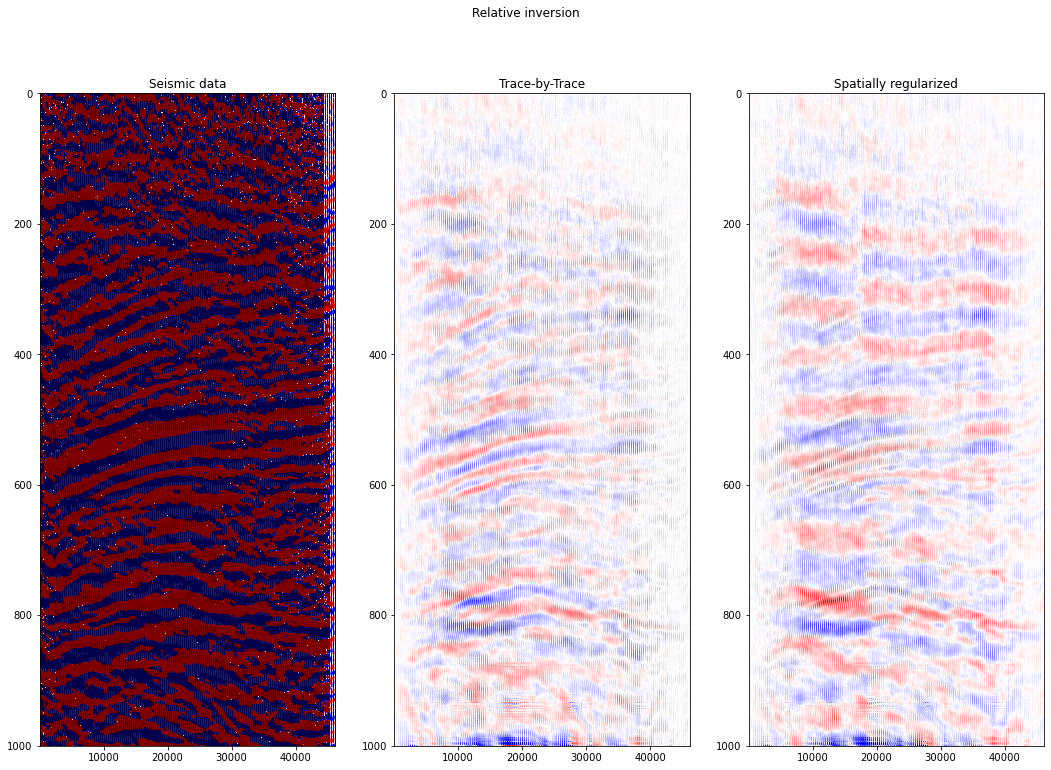

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
fig.suptitle('Relative inversion')
axs[0].imshow(d_small[nil//2].T, cmap='seismic', vmin=-10, vmax=10,
              extent=(xl[0], xl[-1], t[500], t[0]))
axs[0].set_title('Seismic data')
axs[0].axis('tight')
axs[1].imshow(m_relative[nil//2].T, cmap='seismic', vmin=-0.2*m_relative.max(), vmax=0.2*m_relative.max(),
              extent=(xl[0], xl[-1], t[500], t[0]))
axs[1].set_title('Trace-by-Trace')
axs[1].axis('tight')
axs[2].imshow(m_relative_reg[nil//2].T, cmap='seismic', vmin=-0.2*m_relative.max(), vmax=0.2*m_relative.max(),
              extent=(xl[0], xl[-1], t[500], t[0]))
axs[2].set_title('Spatially regularized')
axs[2].axis('tight');

Display the residuals

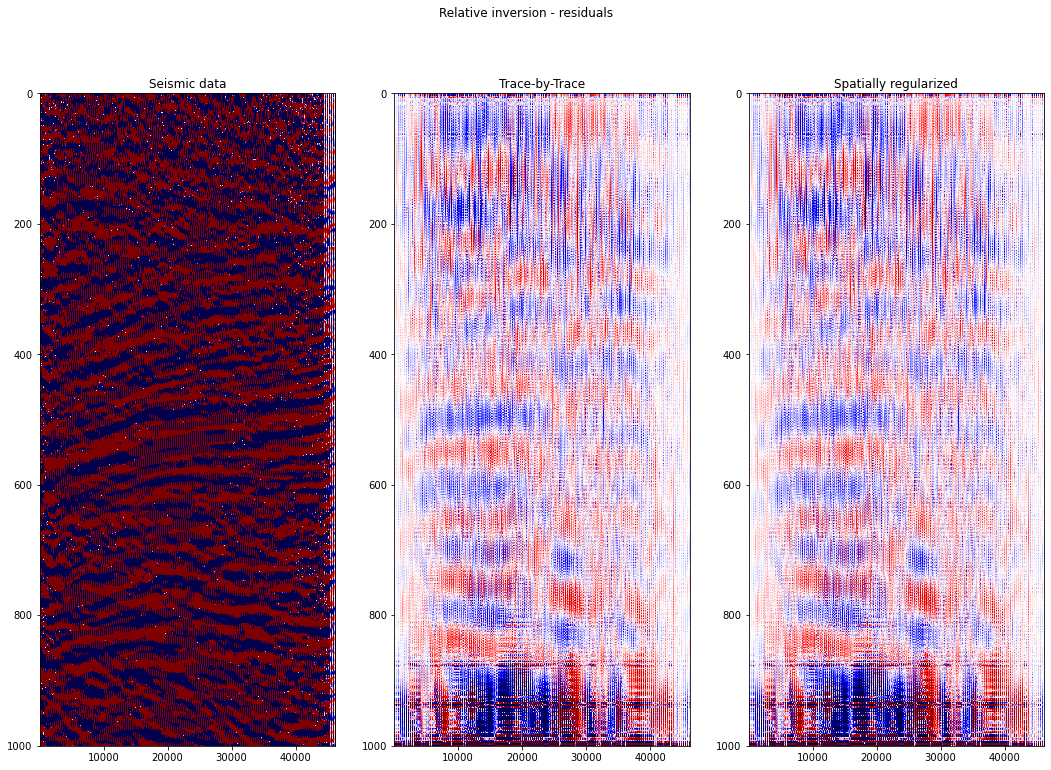

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
fig.suptitle('Relative inversion - residuals')
axs[0].imshow(d_small[nil//2].T, cmap='seismic', vmin=-10, vmax=10,
              extent=(xl[0], xl[-1], t[500], t[0]))
axs[0].set_title('Seismic data')
axs[0].axis('tight')
axs[1].imshow(r_relative[nil//2].T, cmap='seismic', vmin=-10, vmax=10, 
              extent=(xl[0], xl[-1], t[500], t[0]))
axs[1].set_title('Trace-by-Trace')
axs[1].axis('tight')
axs[2].imshow(r_relative_reg[nil//2].T, cmap='seismic', vmin=-10, vmax=10,
              extent=(xl[0], xl[-1], t[500], t[0]))
axs[2].set_title('Spatially regularized')
axs[2].axis('tight');